Elaborado por:

Eliseo Adrian Cardenas Ortiz 19020081
Yolanda Chavez Gutierrez 19020083

In [20]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [21]:
mipath = "australian.dat"
data = pd.read_csv(mipath, sep=" ",header=None)
data.columns = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","class"]
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [22]:
#Particiones
X=data.iloc[:,:-1]#todas las lineas,todas las columnas, menos la ultima
y=data[["class"]]#solo class

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,random_state=45)

BOSQUE ALEATORIO

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)


C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\436068558.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


In [26]:
#score
rfc.score(X_test,y_test)

0.8876811594202898

1. En un ciclo for el modelo base

C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod

Bosque aleatorio con párametros por default 
 Promedio y desviación estándar: 88.8% (0.7)


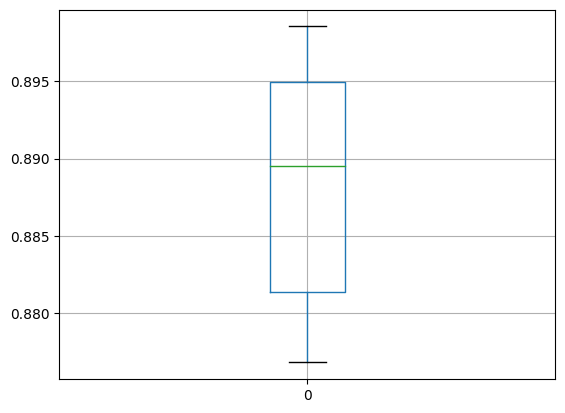

In [27]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('Bosque aleatorio con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [28]:
accAD

[0.8840579710144928,
 0.8804347826086957,
 0.894927536231884,
 0.8876811594202898,
 0.894927536231884,
 0.8804347826086957,
 0.8768115942028986,
 0.8913043478260869,
 0.894927536231884,
 0.8985507246376812]

2. En un ciclo for el modelo con hiper parámetros 

C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
C:\Users\Yolanda\AppData\Local\Temp\ipykernel_16248\2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

Bosque Aleatorio con párametros por default 
 Promedio y desviación estándar: 89.4% (0.4)


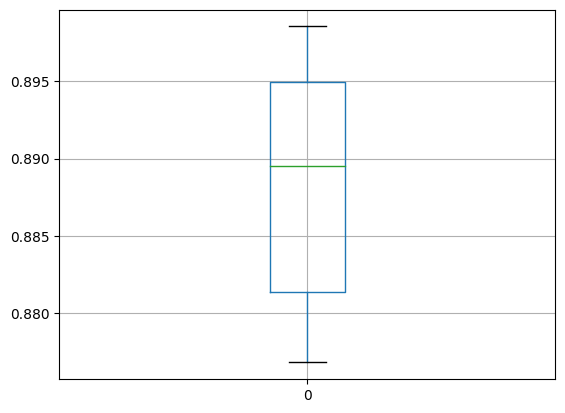

In [29]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier(n_estimators=100, # número de árboles aleatorios a generar para el bosque.
                                        criterion="gini", # función que se mide la calidad de cada división en cada nodo.
                                        max_depth=None, # profundidad máxima de cada árbol.
                                        min_samples_split=2, # mínimo de datos que debe haber en un nodo para continuar dividiéndolo.
                                        min_samples_leaf=1, # mínimo de datos que deben quedar en cada hoja después de cada división.
                                        max_features=12) # máximo de variables a seleccionar aleatoriamente en cada árbol del bosque.)

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('Bosque Aleatorio con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [30]:
accAD2

[0.8840579710144928,
 0.894927536231884,
 0.8913043478260869,
 0.894927536231884,
 0.8985507246376812,
 0.8985507246376812,
 0.894927536231884,
 0.894927536231884,
 0.8913043478260869,
 0.894927536231884]

LINEAR SUPPORT VECTOR CLASSIFIER

In [31]:
from sklearn.svm import LinearSVC


In [32]:
#crear instancia
linear = LinearSVC()
#entrenamiento
linear.fit(X_train, y_train)
#score
linear.score(X_test,y_test)

c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8188405797101449

3. Graficar los boxplot, ambos que se muestren en la misma gráfica. 

In [33]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.884058,0.884058
1,0.880435,0.894928
2,0.894928,0.891304
3,0.887681,0.894928
4,0.894928,0.898551
5,0.880435,0.898551
6,0.876812,0.894928
7,0.891304,0.894928
8,0.894928,0.891304
9,0.898551,0.894928


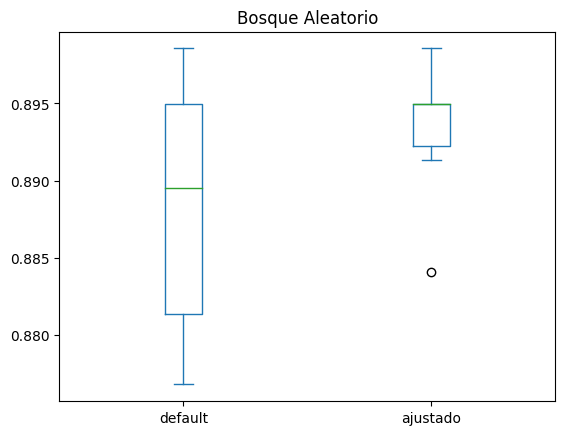

In [34]:
ddff.plot(kind='box')
plt.title('Bosque Aleatorio')
plt.show()

1. En un ciclo for el modelo base

In [35]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = LinearSVC()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('LinearSVC con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
accAD

[0.8514492753623188,
 0.7463768115942029,
 0.8478260869565217,
 0.6992753623188406,
 0.5869565217391305,
 0.8442028985507246,
 0.717391304347826,
 0.7644927536231884,
 0.7644927536231884,
 0.5652173913043478]

2. En un ciclo for el modelo con hiper parámetros 

c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: D

LinearSVC con párametros por default 
 Promedio y desviación estándar: 89.1% (0.0)


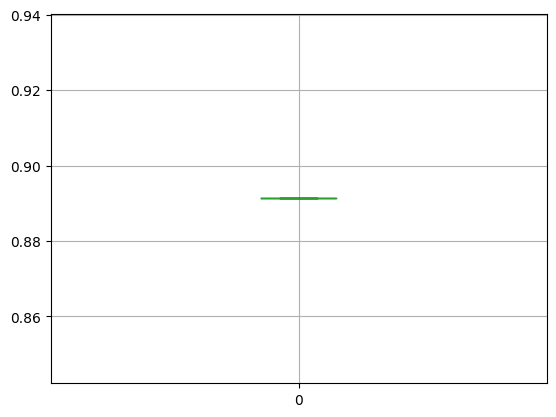

In [ ]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = LinearSVC(C= 0.1,
                          penalty = "l1",
                          dual=False)

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('LinearSVC con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD2).boxplot()
plt.show()

In [ ]:
accAD2

[0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869]

3. Graficar los boxplot, ambos que se muestren en la misma gráfica. 

In [ ]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.851449,0.891304
1,0.746377,0.891304
2,0.847826,0.891304
3,0.699275,0.891304
4,0.586957,0.891304
5,0.844203,0.891304
6,0.717391,0.891304
7,0.764493,0.891304
8,0.764493,0.891304
9,0.565217,0.891304


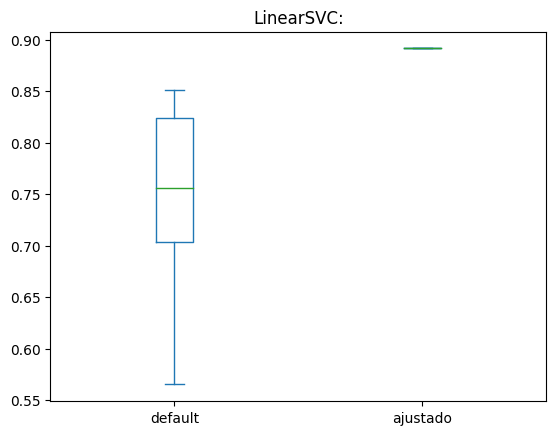

In [ ]:
ddff.plot(kind='box')
plt.title('LinearSVC:')
plt.show()

4. ¿Qué modelo arroja mejores scores? 

El Bosque aleatorio arroja mejores scores, la diferencia es poca pero aumenta en un 0.01 en comparacion con el modelo LinearSVC

Empezamos a trabajar con CROSS VALIDATION

Random Forest

In [42]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [43]:
#Lo primero que tenemos que hacer es crear nuestra malla de valores para el random forest classifier.
grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [18]
}

In [44]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5)
rf_cv.fit(X_train, y_train)

c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Yolanda\AppData\Local\Progra

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [46]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [ ]:
rf2 = RandomForestClassifier(n_estimators=300,
                            max_depth = 7,
                            max_features = 'sqrt',
                            random_state = 18,
                            criterion = 'entropy').fit(X_train, np.ravel(y_train))

In [70]:
y_pred = rf2.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: name 'rf2' is not defined

In [ ]:
confusion_matrix(y_test, y_pred)

array([[148,  14],
       [ 16,  98]], dtype=int64)

LinearSVC

In [75]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import accuracy_score

In [76]:
grid2 = {
    "C": [0.1, 0.5, 2],
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "dual": [False]
}

In [77]:
lsvc_cv = GridSearchCV(estimator=svm.LinearSVC(), param_grid=grid2, cv=5)
lsvc_cv.fit(X_train, y_train)

c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yolanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: D

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 0.5, 2], 'dual': [False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [78]:
lsvc_cv.best_params_

{'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [85]:
lsvc_cv = LinearSVC(C=0.1,
                    dual=False,
                    loss='squared_hinge',
                    penalty='l2').fit(X_train,np.ravel(y_train))

In [86]:
y_pred = lsvc_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8876811594202898

In [87]:
confusion_matrix(y_test, y_pred)

array([[143,  19],
       [ 12, 102]], dtype=int64)